![image.png](../background_photos/libs_04_karmirkar.jpg)
Կարմիրքար (Մեծն Փառախադեմ) [լուսանկարի հղումը](https://unsplash.com/photos/-sq0aMTHHZY), Հեղինակ՝ [Zvart Baghdasaryan](https://unsplash.com/@zvart)

<a href="ToDo" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> (ToDo)

# 📌 Նկարագիր

[📚 Ամբողջական նյութը](04_pandas_2.ipynb)
ToDo

#### 📺 Տեսանյութեր


#### 🏡 Տնային


# 📚 Նյութը
1. [Docs](https://pandas.pydata.org/docs)
2. [Youtube video](https://www.youtube.com/watch?v=ZyhVh-qRZPA&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS)
3. [Kaggle mini course](https://www.kaggle.com/learn/pandas)

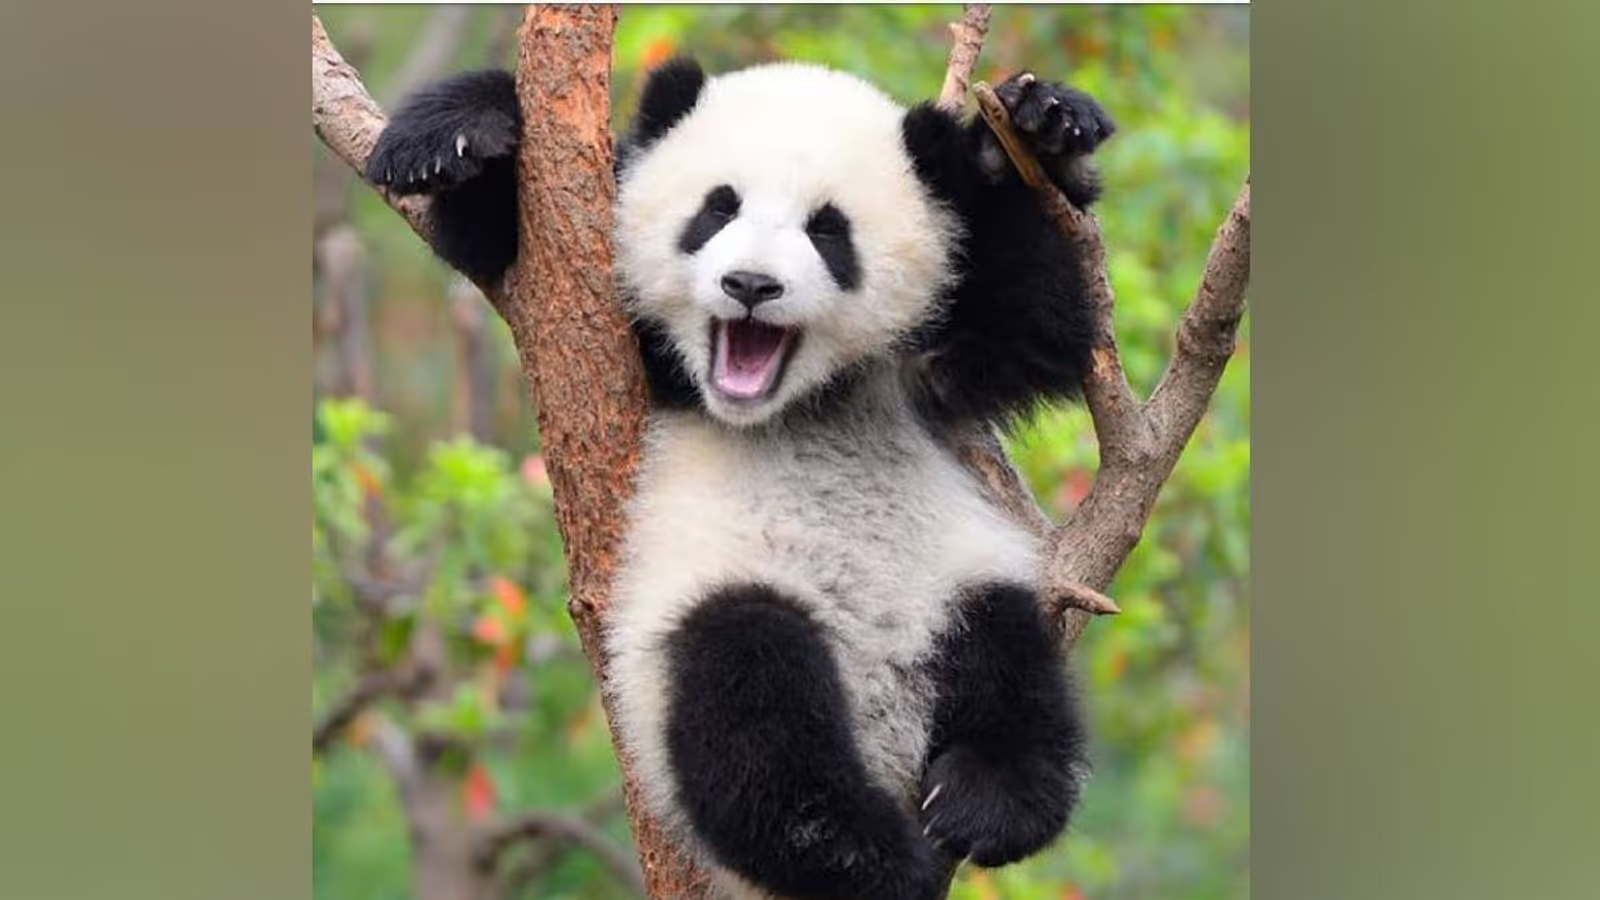

## Joining dfs

### Concat

In [2]:
import pandas as pd

df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

df2 = pd.DataFrame({
    'ID': [4, 5, 6],
    'Name': ['David', 'Eve', 'Frank'],
    'Age': [40, 50, 60]
})

print(df1)
print()
print(df2)

   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35

   ID   Name  Age
0   4  David   40
1   5    Eve   50
2   6  Frank   60


In [9]:
# Concatenating vertically (default axis=0)
result = pd.concat([df1, df2])
result

,ID,Name,Age
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,35
0,4,David,40
1,5,Eve,50
2,6,Frank,60


In [8]:
result.reset_index(drop=True)

,ID,Name,Age,Salary
0,1,Alice,25,50000
1,2,Bob,30,60000
2,3,Charlie,35,70000


In [ ]:
df3 = pd.DataFrame({
    'Salary': [50000, 60000, 70000]
})
print(df3)



   Salary
0   50000
1   60000
2   70000


In [11]:
# Concatenating horizontally
result = pd.concat([df1, df3], axis=1)
result

,ID,Name,Age,Salary
0,1,Alice,25,50000
1,2,Bob,30,60000
2,3,Charlie,35,70000


In [12]:
df4 = pd.DataFrame({
    'ID': [7, 8],
    'Salary': [55000, 75000]
})

# Concatenating with missing columns
print(df1)
print(df4)

   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
   ID  Salary
0   7   55000
1   8   75000


In [16]:
result = pd.concat([df1, df4], axis=0)
print(result)

   ID     Name   Age   Salary
0   1    Alice  25.0      NaN
1   2      Bob  30.0      NaN
2   3  Charlie  35.0      NaN
0   7      NaN   NaN  55000.0
1   8      NaN   NaN  75000.0


In [21]:
import numpy as np

In [20]:
assert np.all(result.isna()), "Օ ոչ"

AssertionError: Օ ոչ

### Concatenating with keys (multi-index)

In [24]:
print(df1)
print()
print(df2)

result = pd.concat([df1, df2], keys=['Group 1', 'Group 2'], axis=0)
print(result)

   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35

   ID   Name  Age
0   4  David   40
1   5    Eve   50
2   6  Frank   60
           ID     Name  Age
Group 1 0   1    Alice   25
        1   2      Bob   30
        2   3  Charlie   35
Group 2 0   4    David   40
        1   5      Eve   50
        2   6    Frank   60


### Merge

In [25]:
df5 = pd.DataFrame({
    'ID': [1, 2],
    'Department': ['HR', 'IT']
})

print(df1)
print(df5)

# Merging DataFrames on 'ID' column
result = pd.merge(df1, df5, on='ID')
result

   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
   ID Department
0   1         HR
1   2         IT


,ID,Name,Age,Department
0,1,Alice,25,HR
1,2,Bob,30,IT


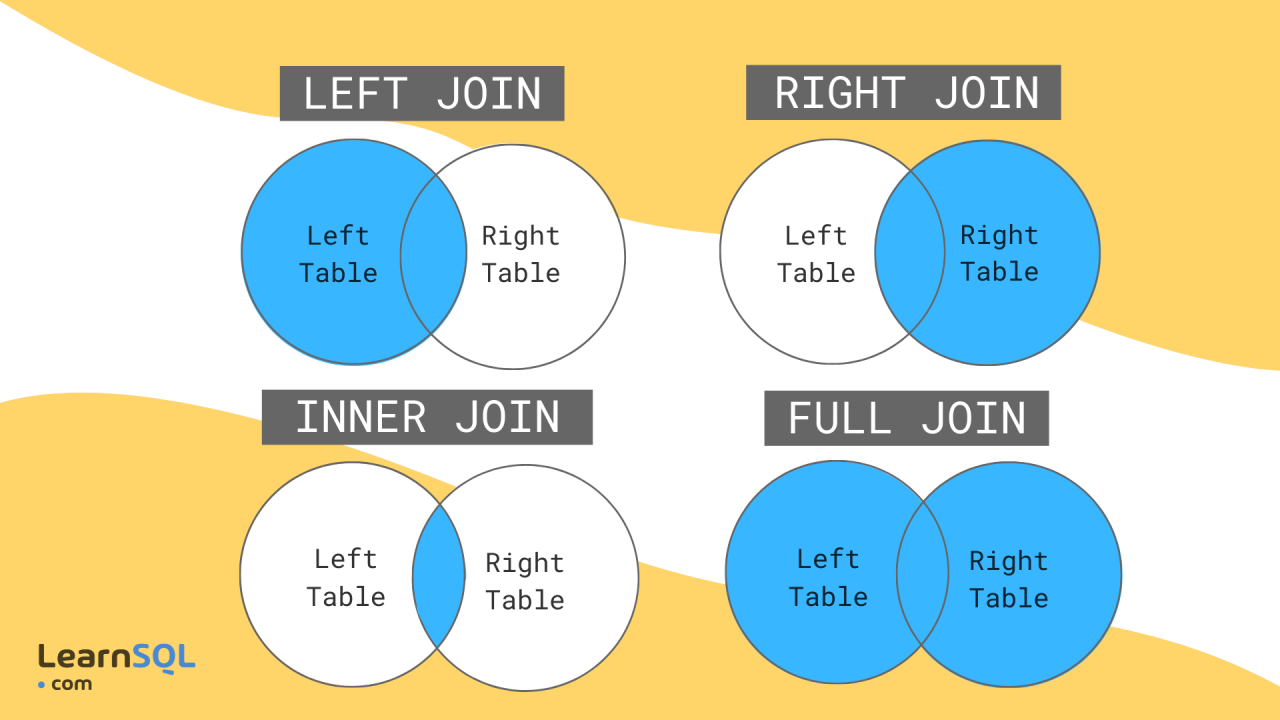

In [ ]:
pd.merge(թրաշ, գլխի մազեր)

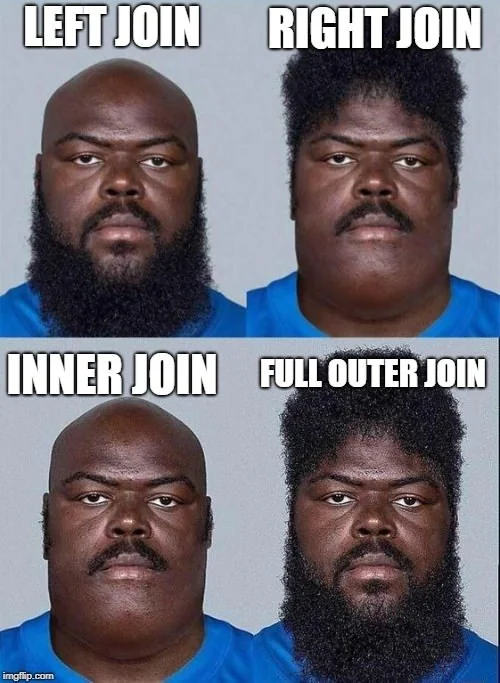

In [26]:
# DataFrame 1
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40]
})

# DataFrame 2
df2 = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'Department': ['HR', 'Finance', 'IT', 'Marketing'],
    'Salary': [50000, 60000, 70000, 80000]
})

print("DataFrame 1:\n", df1)
print("DataFrame 2:\n", df2)

DataFrame 1:
    ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
3   4    David   40
DataFrame 2:
    ID Department  Salary
0   3         HR   50000
1   4    Finance   60000
2   5         IT   70000
3   6  Marketing   80000


In [27]:
result_inner = pd.merge(df1, df2, on='ID', how='inner')
print("Inner Join Result:\n", result_inner)

Inner Join Result:
    ID     Name  Age Department  Salary
0   3  Charlie   35         HR   50000
1   4    David   40    Finance   60000


In [28]:
result_outer = pd.merge(df1, df2, on='ID', how='outer')
print("Outer Join Result:\n", result_outer)

Outer Join Result:
    ID     Name   Age Department   Salary
0   1    Alice  25.0        NaN      NaN
1   2      Bob  30.0        NaN      NaN
2   3  Charlie  35.0         HR  50000.0
3   4    David  40.0    Finance  60000.0
4   5      NaN   NaN         IT  70000.0
5   6      NaN   NaN  Marketing  80000.0


In [29]:
result_left = pd.merge(df1, df2, on='ID', how='left')
print("Left Join Result:\n", result_left)

Left Join Result:
    ID     Name  Age Department   Salary
0   1    Alice   25        NaN      NaN
1   2      Bob   30        NaN      NaN
2   3  Charlie   35         HR  50000.0
3   4    David   40    Finance  60000.0


In [30]:
result_right = pd.merge(df1, df2, on='ID', how='right')
print("Right Join Result:\n", result_right)

Right Join Result:
    ID     Name   Age Department  Salary
0   3  Charlie  35.0         HR   50000
1   4    David  40.0    Finance   60000
2   5      NaN   NaN         IT   70000
3   6      NaN   NaN  Marketing   80000


#### Suffixes

In [ ]:
df7 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [28, 35, 38]
})

print(df1)
print(df7)
# Merging with suffixes for overlapping columns
result = pd.merge(df1, df7, on='ID', suffixes=('_left', '_right'))
result

   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
3   4    David   40
   ID     Name  Age
0   1    Alice   28
1   2      Bob   35
2   3  Charlie   38


,ID,Name_left,Age_left,Name_right,Age_right
0,1,Alice,25,Alice,28
1,2,Bob,30,Bob,35
2,3,Charlie,35,Charlie,38


### Join

In [31]:
df8 = pd.DataFrame({
    'Salary': [50000, 60000, 70000]
}, index=[1, 2, 3])

# Joining DataFrames on index
print(df1)
print(df8)

result = df1.join(df8)
print(result)


   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
3   4    David   40
   Salary
1   50000
2   60000
3   70000
   ID     Name  Age   Salary
0   1    Alice   25      NaN
1   2      Bob   30  50000.0
2   3  Charlie   35  60000.0
3   4    David   40  70000.0


In [32]:
# Inner join (only matching indices)
result = df1.join(df8, how='inner')
print(result)

# Outer join (all rows, NaNs for non-matches)
result = df1.join(df8, how='outer')
print(result)

   ID     Name  Age  Salary
1   2      Bob   30   50000
2   3  Charlie   35   60000
3   4    David   40   70000
   ID     Name  Age   Salary
0   1    Alice   25      NaN
1   2      Bob   30  50000.0
2   3  Charlie   35  60000.0
3   4    David   40  70000.0


### Append - Հնացած ա, նույնն ա ինչ ուղղակի տողերի concat-ը

In [33]:
result = df1.append(df2)
print(result)

result = pd.concat([df1, df2], axis=0)
print(result)

AttributeError: 'DataFrame' object has no attribute 'append'

### Երբ որը օգտագործել

- `concat()` - հասարակ տողեր/սյուներ ավելանցելու համար \
- `merge()` - ըստ ընդհանուր սյուների միավորումներ անելու համար \
- `join()` - ինդեքսով միավորելու, կամ merge գրել ալարելու դեպքում \

Միշտ հիշեք ստուգել `NA`-ներ առաջացել են թե չէ միավորումից հետո

## Excel

In [ ]:
!pip install openpyxl

Արհեստական տվյալների ստեղծում

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create a date range for one year of trading data (252 days)
date_range = pd.date_range(end=datetime.today(), periods=252, freq='B')

# Generate synthetic stock data for two different stocks
stock1 = pd.DataFrame({
    'date': date_range,
    'price': (np.random.rand(252) + 0.5).cumprod() * 100,
    'volume': np.random.randint(1000, 10000, 252)
}).set_index('date')

stock2 = pd.DataFrame({
    'date': date_range,
    'price': (np.random.rand(252) + 0.5).cumprod() * 200,
    'volume': np.random.randint(1000, 10000, 252)
}).set_index('date')

# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter('financial_data.xlsx', engine='openpyxl') as writer:
    # Write each DataFrame to a different worksheet
    stock1.to_excel(writer, sheet_name='Stock1')
    stock2.to_excel(writer, sheet_name='Stock2')


### Reading Excel files

https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

In [ ]:
df = pd.read_excel('financial_data.xlsx') # կարդումա առաջին sheetը
df

,date,price,volume
0,2023-09-18 07:15:07.581,149.566928,4534
1,2023-09-19 07:15:07.581,182.141067,4758
2,2023-09-20 07:15:07.581,110.614319,7274
3,2023-09-21 07:15:07.581,142.842656,4369
4,2023-09-22 07:15:07.581,73.335239,6454
...,...,...,...
247,2024-08-28 07:15:07.581,0.000005,1423
248,2024-08-29 07:15:07.581,0.000004,9728
249,2024-08-30 07:15:07.581,0.000002,5640
250,2024-09-02 07:15:07.581,0.000001,1220


In [35]:
# Reading a specific sheet by its name
df = pd.read_excel('financial_data.xlsx', sheet_name='Stock2')
print(df.head())
# Reading a specific sheet by its index
df = pd.read_excel('financial_data.xlsx', sheet_name=1)
print(df.head())

                     date       price  volume
0 2024-07-19 20:30:03.855  130.728012    4713
1 2024-07-22 20:30:03.855  177.801505    5810
2 2024-07-23 20:30:03.855  133.803179    7428
3 2024-07-24 20:30:03.855  196.716370    5407
4 2024-07-25 20:30:03.855  167.800902    4481
                     date       price  volume
0 2024-07-19 20:30:03.855  130.728012    4713
1 2024-07-22 20:30:03.855  177.801505    5810
2 2024-07-23 20:30:03.855  133.803179    7428
3 2024-07-24 20:30:03.855  196.716370    5407
4 2024-07-25 20:30:03.855  167.800902    4481


In [36]:
# Reading a subset of columns by their names
df = pd.read_excel('financial_data.xlsx', usecols=['price', 'volume'])

print(df.head(1))

# Reading a subset of columns by Excel column letters
df = pd.read_excel('financial_data.xlsx', usecols='B,C')

print(df.head(1))

       price  volume
0  86.042656    7367
       price  volume
0  86.042656    7367


In [37]:
df = pd.read_excel("financial_data.xlsx", nrows=10, skiprows=[1,3,4])
df

,date,price,volume
0,2024-07-22 20:30:03.855,59.918113,8400
1,2024-07-25 20:30:03.855,56.844253,9388
2,2024-07-26 20:30:03.855,73.267239,2279
3,2024-07-29 20:30:03.855,81.634945,3024
4,2024-07-30 20:30:03.855,116.131315,2880
5,2024-07-31 20:30:03.855,66.209462,3483
6,2024-08-01 20:30:03.855,41.375030,8563
7,2024-08-02 20:30:03.855,31.174359,4547
8,2024-08-05 20:30:03.855,27.423572,9376
9,2024-08-06 20:30:03.855,26.678341,6856


### Writing to excel

In [38]:
df['price_in_AMD'] = df["price"] / 383
df

,date,price,volume,price_in_AMD
0,2024-07-22 20:30:03.855,59.918113,8400,0.156444
1,2024-07-25 20:30:03.855,56.844253,9388,0.148418
2,2024-07-26 20:30:03.855,73.267239,2279,0.191298
3,2024-07-29 20:30:03.855,81.634945,3024,0.213146
4,2024-07-30 20:30:03.855,116.131315,2880,0.303215
5,2024-07-31 20:30:03.855,66.209462,3483,0.172871
6,2024-08-01 20:30:03.855,41.375030,8563,0.108029
7,2024-08-02 20:30:03.855,31.174359,4547,0.081395
8,2024-08-05 20:30:03.855,27.423572,9376,0.071602
9,2024-08-06 20:30:03.855,26.678341,6856,0.069656


In [39]:
df.to_excel("file.xlsx", sheet_name='բաժնետոմս 1')
df.to_excel("file_no_index.xlsx", sheet_name='բաժնետոմս 1', index=False)


#### Multiple sheets

In [40]:
with pd.ExcelWriter('two_sheets.xlsx') as writer:
    df.to_excel(writer, sheet_name='բաժնետոմսեր')
    df.sample(10).to_excel(writer, sheet_name='Պատահական 10 տող', index=False)


### read_html

In [ ]:
!pip install html5lib

In [53]:
url_women = "https://armstat.am/am/?nid=12&id=19044&submit=%D5%93%D5%B6%D5%BF%D6%80%D5%A5%D5%AC"
url_men = "https://armstat.am/am/?nid=12&id=19045&submit=%D5%93%D5%B6%D5%BF%D6%80%D5%A5%D5%AC"

df_women = pd.read_html(url_women)
df_men = pd.read_html(url_men)

In [54]:
df_women[1]

,թվական,բացարձակ արժեք,նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)
0,2023,46728.0,103.0
1,2022,45373.0,145.6
2,2021,31171.0,70.5
3,2020,44187.0,106.5
4,2019,41486.0,95.6
5,2018,43390.0,88.0
6,2017,49327.0,97.7
7,2016,50463.0,94.1
8,2015,53601.0,104.9
9,2014,41579.0,92.8


In [56]:
df_men = df_men[1]
df_women = df_women[1]

### melt

In [57]:
pd.merge(df_men, df_women, on="թվական", how="outer")

,թվական,բացարձակ արժեք_x,նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_x,բացարձակ արժեք_y,նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_y
0,2000,27401.0,96.6,33325.0,99.8
1,2001,30320.0,110.7,37026.0,111.1
2,2002,34087.0,112.4,40067.0,108.2
3,2003,35694.0,104.7,44780.0,111.8
4,2004,38961.0,109.2,49178.0,109.8
5,2005,45661.0,117.2,55640.0,113.1
6,2006,49427.0,108.2,60549.0,108.8
7,2007,52489.0,106.2,64099.0,105.9
8,2008,55826.0,106.4,65618.0,102.4
9,2009,56533.0,101.3,67177.0,102.4


In [68]:
df = pd.merge(df_men, df_women, on="թվական", how="outer", suffixes=('_men', "_women"))
df

,թվական,բացարձակ արժեք_men,նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_men,բացարձակ արժեք_women,նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_women
0,2000,27401.0,96.6,33325.0,99.8
1,2001,30320.0,110.7,37026.0,111.1
2,2002,34087.0,112.4,40067.0,108.2
3,2003,35694.0,104.7,44780.0,111.8
4,2004,38961.0,109.2,49178.0,109.8
5,2005,45661.0,117.2,55640.0,113.1
6,2006,49427.0,108.2,60549.0,108.8
7,2007,52489.0,106.2,64099.0,105.9
8,2008,55826.0,106.4,65618.0,102.4
9,2009,56533.0,101.3,67177.0,102.4


In [69]:
df.columns

Index(['թվական', 'բացարձակ արժեք_men',
       'նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_men',
       'բացարձակ արժեք_women',
       'նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_women'],
      dtype='object')

In [71]:
df.drop(columns=['նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_men',
                 'նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_women'], 
        inplace=True)

In [73]:
df.columns

Index(['թվական', 'բացարձակ արժեք_men', 'բացարձակ արժեք_women'], dtype='object')

In [85]:
df.rename(columns={"թվական": "year",
                   "բացարձակ արժեք_men": "men", 
                   "բացարձակ արժեք_women": "women"}, inplace=True)

In [86]:
long = pd.melt(df, id_vars=['year'], value_vars=['men','women'], 
               var_name="gender", value_name="students")

In [87]:
long

,year,gender,students
0,2000,men,27401.0
1,2001,men,30320.0
2,2002,men,34087.0
3,2003,men,35694.0
4,2004,men,38961.0
5,2005,men,45661.0
6,2006,men,49427.0
7,2007,men,52489.0
8,2008,men,55826.0
9,2009,men,56533.0


### Dask

- https://www.dask.org/
- https://docs.dask.org/en/stable/dataframe.html

https://colab.research.google.com/drive/19X1gECPhcqUfACZQgU0-HtbPf_j1lrxj?usp=sharing

In [103]:
!conda install dask

^C


In [ ]:
import dask.dataframe as dd

In [ ]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"

tips = dd.read_csv(url)       # Parallelized under the hood

print(tips.columns)

In [ ]:
tips.total_bill.describe()#.compute()


## Datetime

In [108]:
import matplotlib.cbook as cbook

with cbook.get_sample_data("msft.csv") as fp:
    msft = pd.read_csv(fp)



In [110]:
msft

,Date,Open,High,Low,Close,Volume,Adj. Close*
0,19-Sep-03,29.76,29.97,29.52,29.96,92433800,29.79
1,18-Sep-03,28.49,29.51,28.42,29.50,67268096,29.34
2,17-Sep-03,28.76,28.95,28.47,28.50,47221600,28.34
3,16-Sep-03,28.41,28.95,28.32,28.90,52060600,28.74
4,15-Sep-03,28.37,28.61,28.33,28.36,41432300,28.20
...,...,...,...,...,...,...,...
60,25-Jun-03,25.64,25.99,25.14,25.26,60483500,25.12
61,24-Jun-03,25.65,26.04,25.52,25.70,51820300,25.56
62,23-Jun-03,26.14,26.24,25.49,25.78,52584500,25.64
63,20-Jun-03,26.34,26.38,26.01,26.33,86048896,26.18


In [111]:
msft["Date"] = pd.to_datetime(msft["Date"])        # parse strings → Timestamp
msft 

C:\Users\hayk_\AppData\Local\Temp\ipykernel_32664\50020301.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  msft["Date"] = pd.to_datetime(msft["Date"])        # parse strings → Timestamp


,Date,Open,High,Low,Close,Volume,Adj. Close*
0,2003-09-19,29.76,29.97,29.52,29.96,92433800,29.79
1,2003-09-18,28.49,29.51,28.42,29.50,67268096,29.34
2,2003-09-17,28.76,28.95,28.47,28.50,47221600,28.34
3,2003-09-16,28.41,28.95,28.32,28.90,52060600,28.74
4,2003-09-15,28.37,28.61,28.33,28.36,41432300,28.20
...,...,...,...,...,...,...,...
60,2003-06-25,25.64,25.99,25.14,25.26,60483500,25.12
61,2003-06-24,25.65,26.04,25.52,25.70,51820300,25.56
62,2003-06-23,26.14,26.24,25.49,25.78,52584500,25.64
63,2003-06-20,26.34,26.38,26.01,26.33,86048896,26.18


In [112]:
msft.set_index("Date", inplace=True) 
msft

,Open,High,Low,Close,Volume,Adj. Close*
Date,,,,,,
2003-09-19,29.76,29.97,29.52,29.96,92433800,29.79
2003-09-18,28.49,29.51,28.42,29.50,67268096,29.34
2003-09-17,28.76,28.95,28.47,28.50,47221600,28.34
2003-09-16,28.41,28.95,28.32,28.90,52060600,28.74
2003-09-15,28.37,28.61,28.33,28.36,41432300,28.20
...,...,...,...,...,...,...
2003-06-25,25.64,25.99,25.14,25.26,60483500,25.12
2003-06-24,25.65,26.04,25.52,25.70,51820300,25.56
2003-06-23,26.14,26.24,25.49,25.78,52584500,25.64


In [114]:
msft.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj. Close*', 'Year',
       'Weekday'],
      dtype='object')

In [115]:
msft.drop(columns=["High", "Low", "Open", "Volume", "Adj. Close*"], inplace=True)

In [116]:
msft["Year"]     = msft.index.year          # 2003
msft["Weekday"]  = msft.index.day_name()    # “Monday” …
msft 

,Close,Year,Weekday
Date,,,
2003-09-19,29.96,2003,Friday
2003-09-18,29.50,2003,Thursday
2003-09-17,28.50,2003,Wednesday
2003-09-16,28.90,2003,Tuesday
2003-09-15,28.36,2003,Monday
...,...,...,...
2003-06-25,25.26,2003,Wednesday
2003-06-24,25.70,2003,Tuesday
2003-06-23,25.78,2003,Monday


In [117]:
monthly = msft["Close"].resample("M").mean()
monthly

C:\Users\hayk_\AppData\Local\Temp\ipykernel_32664\2846096206.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = msft["Close"].resample("M").mean()


Date
2003-06-30    25.770000
2003-07-31    26.799545
2003-08-31    26.038571
2003-09-30    28.466429
Freq: ME, Name: Close, dtype: float64

## Vectorization

In [119]:
import numpy as np
import pandas as pd

import math
import timeit

# ---------- Setup ----------
n = 1_000_000  # one‑million‑row Series
s = pd.Series(np.random.rand(n))

# ---------- Three approaches ----------
def vectorized(series):
    return np.log1p(series)          # NumPy ufunc (C speed)

def apply_method(series):
    return series.apply(math.log1p)  # Pandas .apply (per‑row call)

def python_loop(series):
    return pd.Series([math.log1p(x) for x in series], index=series.index)

# ---------- Benchmark helper ----------
def avg_seconds(func, series, reps=5, runs=3):
    times = timeit.repeat(lambda: func(series), repeat=reps, number=runs)
    return np.mean(times) / runs     # average seconds per single run

avg_vec   = avg_seconds(vectorized, s)
avg_apply = avg_seconds(apply_method, s)
avg_loop  = avg_seconds(python_loop, s)

# ---------- Summarize ----------
summary = pd.DataFrame({
    "Method": ["Vectorized (NumPy)", "Series.apply()", "Python loop"],
    "Avg seconds per run": [round(avg_vec, 4), round(avg_apply, 4), round(avg_loop, 4)],
    "Relative to vectorized": [1.0,
                               round(avg_apply / avg_vec, 1),
                               round(avg_loop / avg_vec, 1)],
})

print(f"• .apply is ~{avg_apply/avg_vec:.0f}× slower than vectorized, "
      f"but ~{avg_loop/avg_apply:.0f}× faster than a pure Python loop.")

summary

• .apply is ~13× slower than vectorized, but ~2× faster than a pure Python loop.


,Method,Avg seconds per run,Relative to vectorized
0,Vectorized (NumPy),0.0284,1.0
1,Series.apply(),0.3616,12.7
2,Python loop,0.6823,24.0


Բութ մատի օրենք
> Vectorize if you can, .apply if you must, loop only when there’s no other way.

# 🏡Տնային
Վերցնել ցանկցած դատասեթ ու փորփրել։ 

Կարող եք դատան վերցնել [Kaggle](https://www.kaggle.com/datasets?fileType=csv)-ից։ Կամ եթե հայկական եք ուզում՝ [Armstat](https://armstat.am/am/)-ից

# 🎲 22 (04)
- ▶️[Aree Educational Center](https://www.youtube.com/watch?v=jvFGHzLPSO0)
- ▶️[Random link](https://www.instagram.com/reel/DKr7Sd5RnqI/?utm_source=ig_web_copy_link&igsh=MzRlODBiNWFlZA==)
- 🇦🇲🎶[Կատուներ (Նորևան)](https://www.youtube.com/watch?v=ZQAfoIvC6sY)
- 🌐🎶[Don McLean (Vincent)](https://www.youtube.com/watch?v=oxHnRfhDmrk)
- 🤌[Կարգին](https://www.youtube.com/watch?v=oYbSr-GJ2Zk)